## Deustch-Jozsa algorithm, Z_2^4 case

### 1. Initialization

In [22]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister
import math

In [28]:
# set data
def dec2bin(num):
    num_bits = math.ceil(2)
    binary_str = bin(num)[2:]
    binary_str_fixed = binary_str.zfill(num_bits)
    return binary_str_fixed

const_Matrix = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
balence_Matrix = [[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,0,1,1]]

# choose matrix
Matrix = balence_Matrix

# transform matrix to support set
support_set = []
for i in range(4):
    for j in range(4):
        if Matrix[i][j] == 1:
            str = dec2bin(i) + dec2bin(j)
            support_set.append(str)
print(support_set)

['0000', '0001', '0100', '0110', '1000', '1011', '1110', '1111']


### 2. map circuit

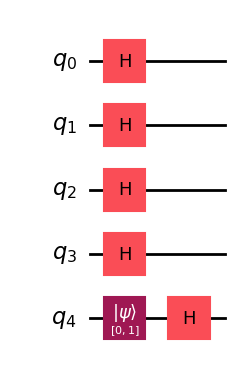

In [29]:
qc = QuantumCircuit(5)
qc.initialize([0,1], 4)
for i in range(5):
    qc.h(i)
qc.draw(output='mpl')

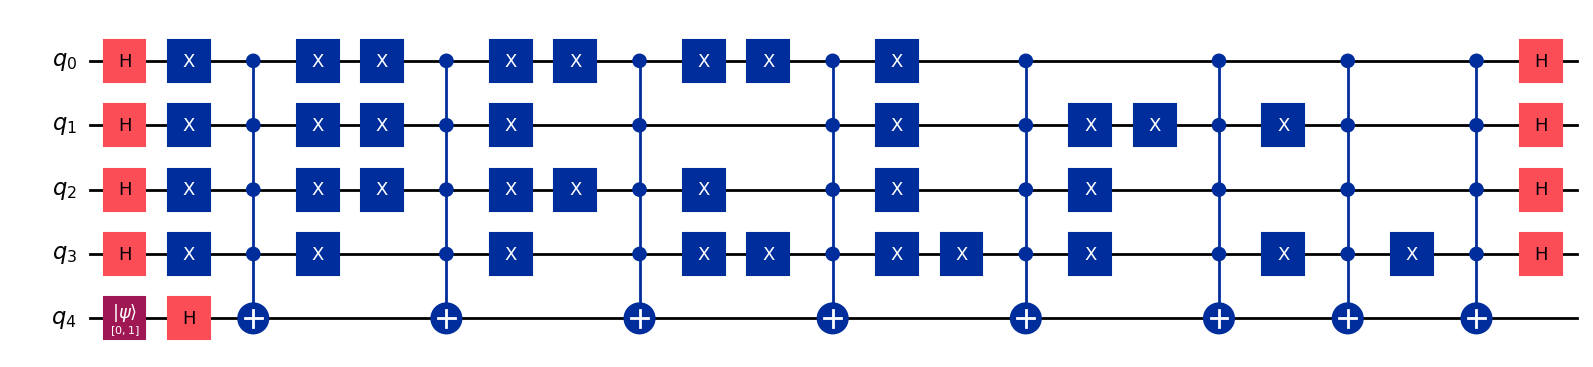

In [30]:
# build oracle
def single_oracle(qc, str):
    for i in range(4):
        if str[i] == '0':
            qc.x(i)
    gate = MCXGate(4)
    qc.append(gate, range(5))
    for i in range(4):
        if str[i] == '0':
            qc.x(i)
    return qc

def oracle(qc, support_set):
    for str in support_set:
        qc = single_oracle(qc, str)
    return qc

qc = oracle(qc, support_set)
for i in range(4):
    qc.h(i)
qc.draw(output='mpl')

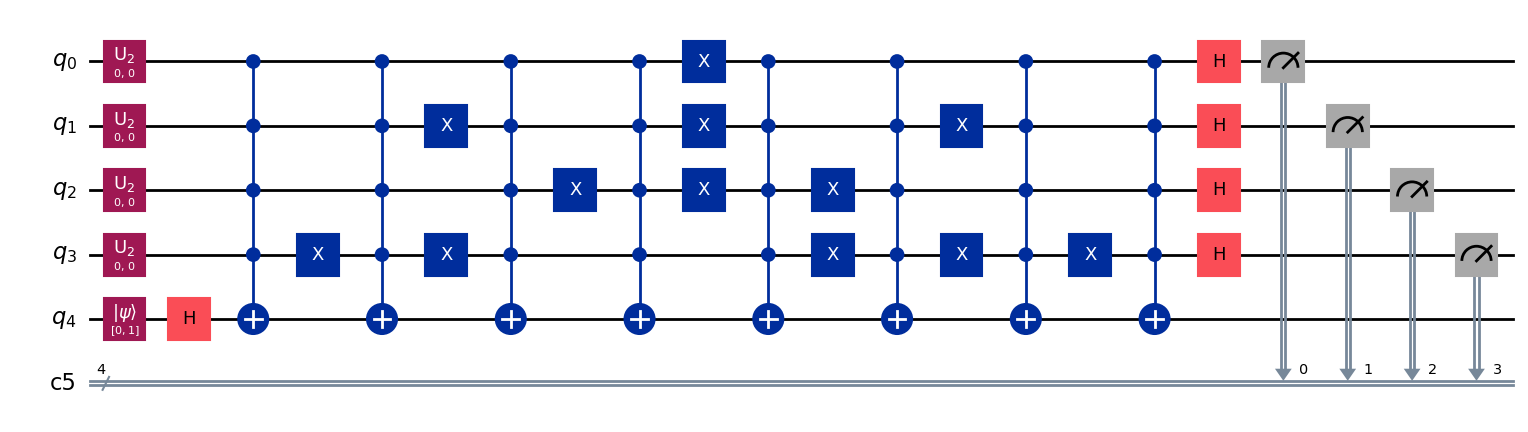

In [31]:
# transpile and measure
qc = transpile(qc, backend=AerSimulator(), optimization_level=2)

c = ClassicalRegister(4)
qc.add_register(c)
for i in range(4):
    qc.measure(i, c[i])
qc.draw(output='mpl')

### 3. execute and test

In [32]:
results = execute_qc(qc)
print(results)

{'0110': 287, '1111': 69, '1110': 57, '0101': 242, '1000': 62, '1011': 61, '1010': 56, '1100': 52, '1001': 64, '1101': 74}
